In [5]:
import jax
from jax import numpy as jnp
from jax import jit, vmap, grad
from matplotlib import pyplot as plt

In [6]:
@jit
def LiteMish(x, params):
    x1, x2 = params
    a = (0.5*x2)/(x1*(x1-x2))
    b = -(x1+x2)/(2*x1*x2)
    return jnp.where(x < x1, 0.0, jnp.where(x < x2, a*jnp.square(x - x1), jnp.where(x < 0.0, b*x*x + x, x)))

In [ ]:
N = 1000

@jit
def L2(uv):
    u, v = uv
    x2 = -jax.nn.squareplus(u)
    x1 = x2 - jax.nn.squareplus(v)
    params = jnp.array([x1, x2])
    X = jnp.linspace(start = x1, stop = 0.0, num = N)
    Y_LiteMish = LiteMish(X, params)
    Y_Mish = jax.nn.mish(X)

    return (-x1/N)*jnp.sum(jnp.square(Y_LiteMish - Y_Mish))

L2_grad = grad(L2, argnums = 0)

In [ ]:
I = jnp.linspace(start = -10.0, stop = +5.0, num = 1500) # Evaluation interval
uv = jnp.array([1.0, 4.0]) # Initial u-v parameters

steps = 1000
step_size = 10.0

params_list = []
MSE_list = []


for i in range(steps):
    u, v = uv
    x2 = -jax.nn.squareplus(u)
    x1 = x2 - jax.nn.squareplus(v)

    params = jnp.array([x1, x2])
    params_list.append(params)
    MSE = jnp.mean(jnp.square(LiteMish(I, params) - jax.nn.mish(I))) # Closeness MSE
    MSE_list.append(MSE)

    print("Step = ", i, ", MSE = ", MSE)

    L_grad = L2_grad(uv) + jnp.array([jnp.square(jax.nn.mish(x1)), 0.0])
    uv = uv - step_size*L_grad

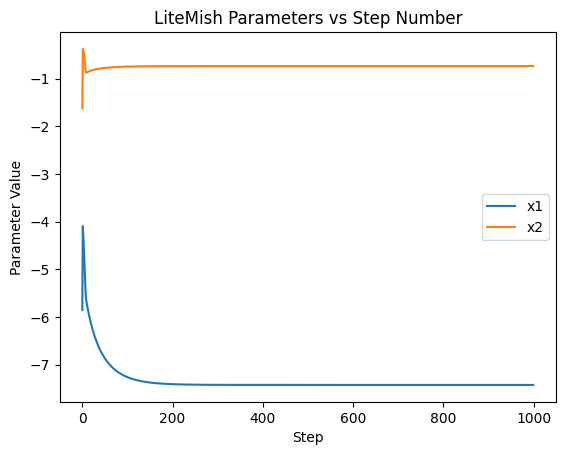

In [43]:
params_list = jnp.asarray(params_list)

plt.figure()
plt.plot(params_list[:, 0], label = "x1")
plt.plot(params_list[:, 1], label = "x2")
plt.legend()
plt.title("LiteMish Parameters vs Step Number")
plt.xlabel("Step")
plt.ylabel("Parameter Value")
plt.show()

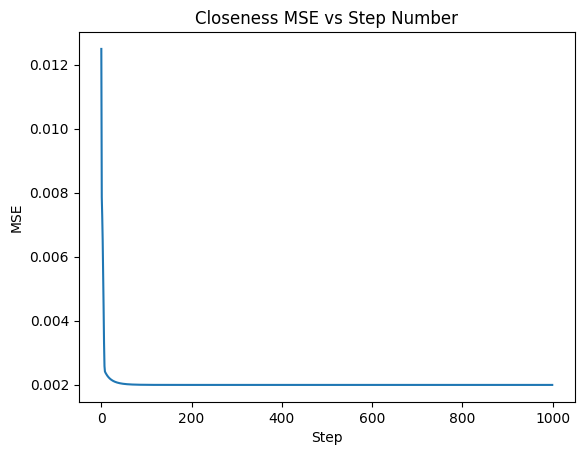

In [42]:
MSE_list = jnp.asarray(MSE_list)

plt.figure()
plt.plot(MSE_list)
plt.title("Closeness MSE vs Step Number")
plt.xlabel("Step")
plt.ylabel("MSE")
plt.show()

In [ ]:
print("Optimal Parameters: [x1, x2] = ", params_list[-1])

x1, x2 = params = params_list[-1]
a = (0.5*x2)/(x1*(x1-x2))
b = -(x1+x2)/(2*x1*x2)

print("a = ", a, " | b = ", b)

Optimal Parameters: [x1, x2] =  [-7.4221873  -0.73744017]
a =  -0.007431558  | b =  0.7453867


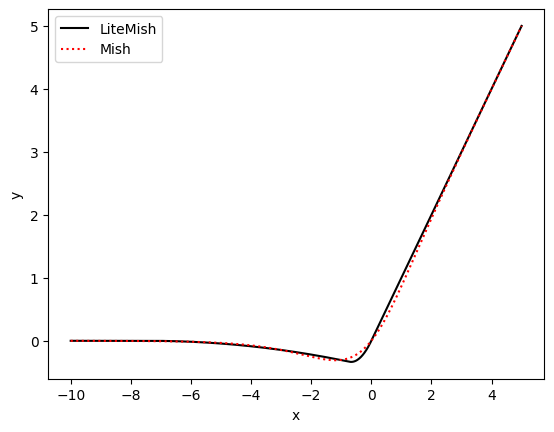

In [ ]:
X = jnp.linspace(start = -10.0, stop = +5.0, num = 1000)

plt.figure()
plt.plot(X, LiteMish(X, params), label = "LiteMish", color="black")
plt.plot(X, jax.nn.mish(X), label = "Mish", color="red", linestyle="dotted")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

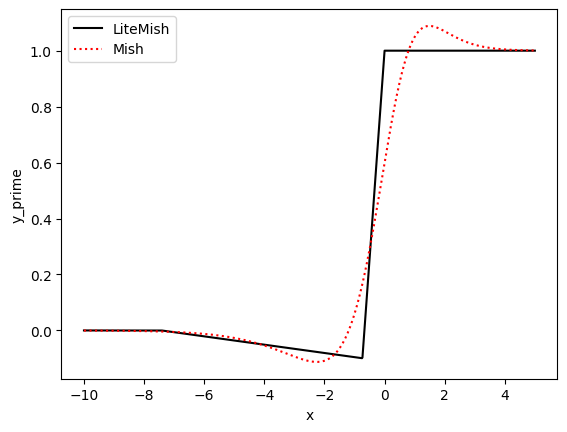

In [37]:
LiteMish_prime = grad(LiteMish, argnums = 0)
Mish_prime = grad(jax.nn.mish, argnums = 0)

Y_prime_LiteMish = []
Y_prime_Mish = []

for x in X:
    Y_prime_LiteMish.append(LiteMish_prime(x, params))
    Y_prime_Mish.append(Mish_prime(x))

Y_prime_LiteMish = jnp.array(Y_prime_LiteMish)
Y_prime_Mish = jnp.array(Y_prime_Mish)

plt.figure()
plt.plot(X, Y_prime_LiteMish, label="LiteMish", color="black")
plt.plot(X, Y_prime_Mish, label="Mish", color="red", linestyle="dotted")
plt.xlabel("x")
plt.ylabel("y_prime")
plt.legend()
plt.show()